In [1]:
import pandas as pd
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号


feature_D = pd.read_excel(
    "../../../Features/Results/feature_importance_D.xlsx", index_col=False
)
feature_P = pd.read_excel(
    "../../../Features/Results/feature_importance_P.xlsx", index_col=False
)
feature_H = pd.read_excel(
    "../../../Features/Results/feature_importance_H.xlsx", index_col=False
)
# 获取前20个特征
top_20_features_D = feature_D[:20]["Feature"]
top_20_features_H = feature_H[:20]["Feature"]
top_20_features_P = feature_P[:20]["Feature"]

In [2]:
train = pd.read_excel("../../../Dataset/train_data.xlsx", index_col=False)
test = pd.read_excel("../../../Dataset/test_data.xlsx", index_col=False)
X_train_D = train[top_20_features_D]
X_train_P = train[top_20_features_P]
X_train_H = train[top_20_features_H]

X_test_D = test[top_20_features_D]
X_test_P = test[top_20_features_P]
X_test_H = test[top_20_features_H]

y_train_D = train["D"]
y_train_P = train["P"]
y_train_H = train["H"]

y_test_D = test["D"]
y_test_P = test["P"]
y_test_H = test["H"]

In [3]:
def shap_analysis(model, X, title=""):
    # Create SHAP explainer
    explainer = shap.Explainer(model, X)

    shap_values = explainer(X)

    # 创建一个包含两个子图的画布
    fig = plt.figure()

    ax0 = fig.add_subplot(121)
    shap.plots.bar(shap_values, show=False, max_display=11)
    plt.gca().tick_params(labelsize=12)  # 调整字体大小

    ax1 = fig.add_subplot(122)
    shap.plots.beeswarm(shap_values, show=False, max_display=11)
    plt.gca().tick_params(labelsize=12)  # 调整字体大小

    plt.gcf().set_size_inches(14, 6)

    # 添加标题
    plt.suptitle(title)

    # 显示图形
    plt.tight_layout()  # 调整布局以避免标题重叠
    plt.show()

In [4]:
model_D = joblib.load("model_D.joblib")
model_P = joblib.load("model_P.joblib")
model_H = joblib.load("model_H.joblib")

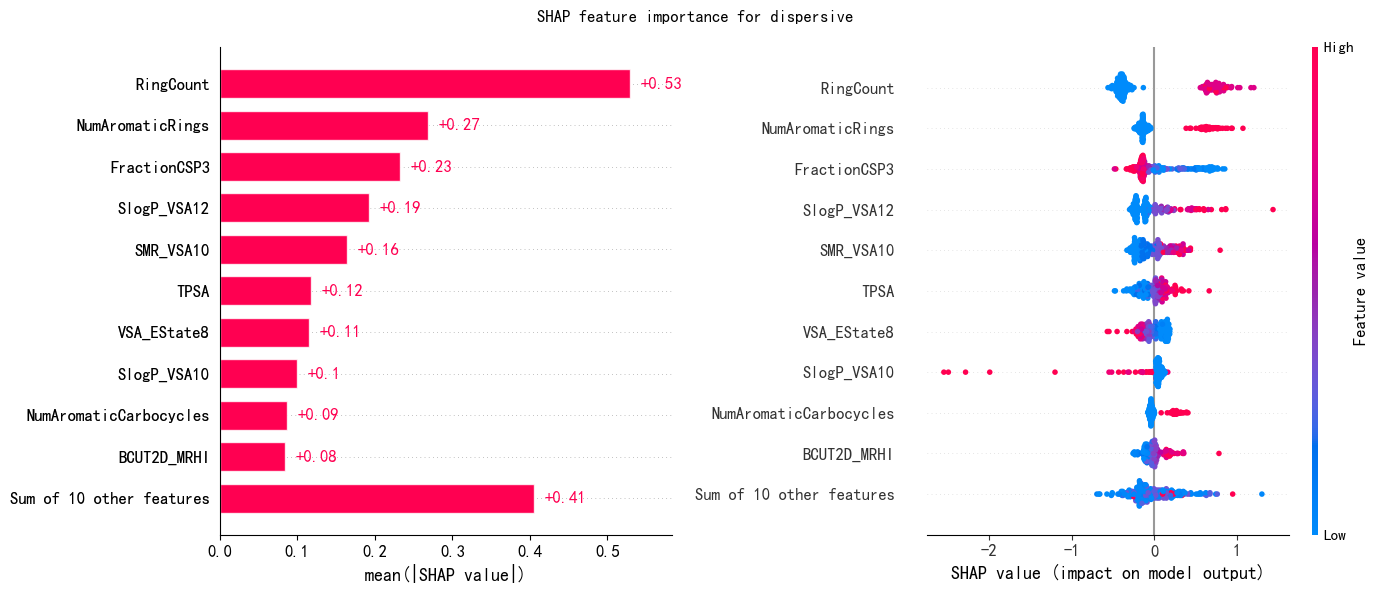

In [5]:
shap_analysis(model_D, X_test_D, title="SHAP feature importance for dispersive")

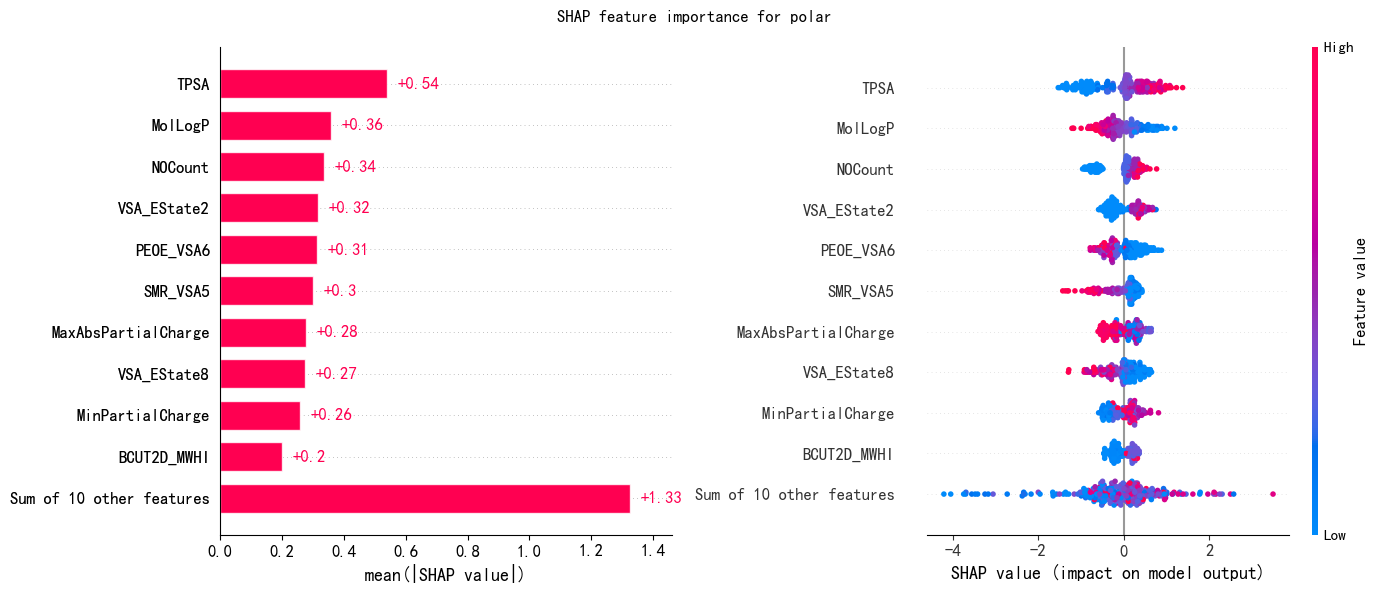

In [6]:
shap_analysis(model_P, X_test_P, title="SHAP feature importance for polar")

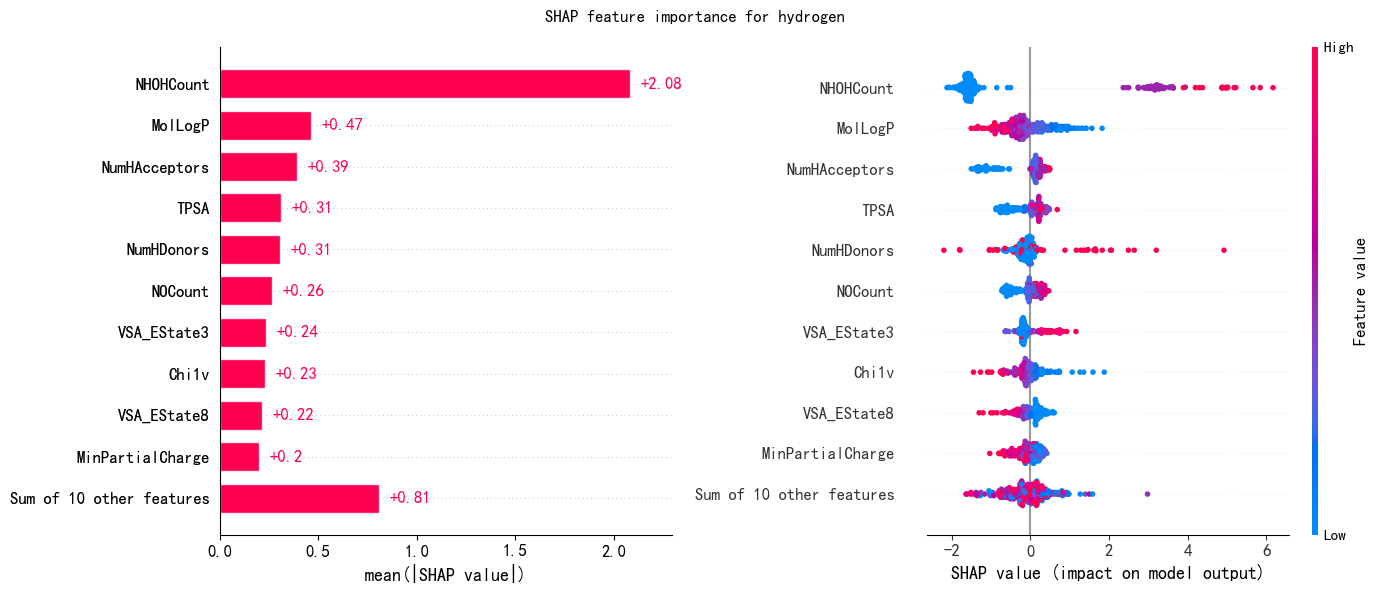

In [7]:
shap_analysis(model_H, X_test_H, title="SHAP feature importance for hydrogen")